In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "20220823_mc_selec_total_L1"

path = "/users/yewzzang/work/JSNS2_vertex/result/" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




# path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +".csv"
# pred_path = glob.glob(path)
# pred_list = [file for file in pred_path if file.endswith(".csv")]

# path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_feature.csv"
# feature_path = glob.glob(path)
# feature_list = [file for file in feature_path if file.endswith(".csv")]

# path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"_batch.csv"
# batch_path = glob.glob(path)
# batch_list = [file for file in batch_path if file.endswith(".csv")]


# path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_btag.csv"
# btag_path = glob.glob(path)
# btag_list = [file for file in btag_path if file.endswith(".csv")]


d = train_list
# dd = pred_list
# ddd = feature_list
# # dddd = pos_list
# ddddd = batch_list
# dddddd = btag_list

In [3]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

In [4]:
# d = ['/users/yewzzang/work/JSNS2_vertex/result/20220808_cf_wf_test1_L1/train.csv',
# #  '/users/yewzzang/work/JSNS2_vertex/result/20220808_cf_ch_test1_L2/train.csv',
# #  '/users/yewzzang/work/JSNS2_vertex/result/20220808_cf_ch_test1/train.csv',
# #  '/users/yewzzang/work/JSNS2_vertex/result/20220808_cf_wf_test1_L2/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20220808_cf_ch_test1_L1/train.csv']

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


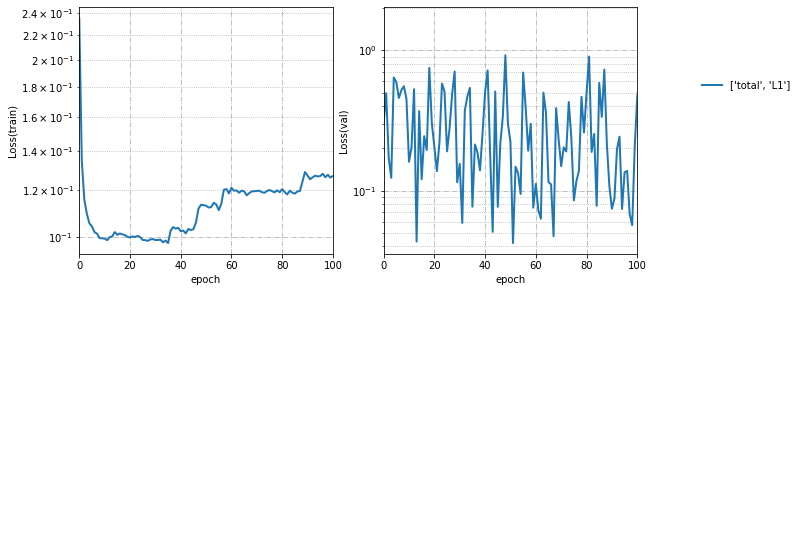

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')


for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,100])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])

    label = d[i].split('/')[-2].replace('__', ' ').split('_')[-2:]
#     label = d[i]
    l =  ax1.plot(df['loss'], linewidth=2)
    ax2.plot(df['val_loss'], linewidth=2)



    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels, fontsize = 20)
ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

In [6]:
d

['/users/yewzzang/work/JSNS2_vertex/result/20220823_mc_selec_total_L1/train.csv']

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
for i in range(len(dd)):
    df = pd.read_csv(dd[i])
#     df2 = pd.read_csv(ddd[i])
    tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['scale']*df['weight'], pos_label=0)
    try:
        auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['scale']*df['weight'])
    except:
        aaa = 0 
        for j in range(len(fpr)):
            if j == 0:
                aa = tpr[j]*(fpr[j]-0)
            else:
                aa = tpr[j]*(fpr[j]-fpr[j-1])
            aaa = aaa + aa
        auc = aaa



#     plt.plot(fpr, tpr, label=dd[i].split('/')[-2].replace('__', ' ')+'  AUC = %.3f' % (auc))
#     lab = d[i].split('/')[-2].replace('__', ' ')
    label = dd[i]
    plt.plot(fpr, tpr, label='AUC = %.3f' % (auc) + '   ' , linewidth='2')
#     plt.plot(fpr, tpr, linewidth='2')
 
        
        
    plt.xlabel('FN efficiency')
    plt.ylabel('ME efficiency')
    #plt.xlim(0, 0.001)
    plt.xlim(0, 1.000)
    plt.ylim(0, 1.050)
    plt.legend(loc = 'lower right',fontsize=20)
#     plt.legend(bbox_to_anchor=(1.1, -14, 15, 15))
    # plt.savefig('result/' +args.output + '/' + args.output + '_efficiency.png', dpi=300)
    plt.grid()
#     plt.show()

  



NameError: name 'dd' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score
df = pd.read_csv(dd[0])
df['scaledWeight'] = df['weight']*df['scale']
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['scaledWeight'], pos_label=0)
try:
    auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['scaledWeight'])
except:
    auc = 1

df_bkg = df[df.label==0]
df_sig = df[df.label==1]

plt.hist(df_bkg['prediction']*100, histtype='step', 
         weights=df_bkg['scaledWeight'], density = 'True', 
         bins=50, alpha=0.7, color='red', 
         label='QCD', linewidth=3)
plt.hist(df_sig['prediction']*100, histtype='step', 
         weights=df_sig['scaledWeight'], density = 'True', 
         bins=50, alpha=0.7, color='blue', 
         label='4top', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)

#plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc = 'upper center')
# plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
plt.show()
plt.clf()
################################################################
plt.hist(df_bkg['prediction']*100, histtype='step', weights=df_bkg['scaledWeight'], bins=50, alpha=0.7, color='red', label='Bkg', linewidth=3)
plt.hist(df_sig['prediction']*100, histtype='step', weights=df_sig['scaledWeight'], bins=50, alpha=0.7, color='blue', label='Sig', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)


#plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc = 'upper center')
# plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
plt.show()
plt.clf()

################################################################################

# plt.plot(fpr, tpr, '.-', label='AUC = ' + '%s %f' % (auc, lab))
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc) + '   ' , linewidth='2')
 
plt.xlabel('Bkg')
plt.ylabel('Sig')
#plt.xlim(0, 0.001)
plt.xlim(0, 1.000)
plt.ylim(0, 1.000)
plt.legend(loc = 'lower center')
# plt.savefig('result/' +output + '/' + output + '_efficiency.png', dpi=300)
plt.grid()
plt.show()
plt.clf()



In [ ]:
###### max pt
df3 = pd.read_csv(ddd[0])
df4 = pd.read_csv(ddddd[0])
df4 = np.array(df4)
df3 = np.array(df3).reshape(-1,4)  ## pt / eta / phi / mass
#### 각 batch 안에서 최대 max pt의 feature들 뽑기
a = 0
max_pt_features = []
for i in range(len(df4)):
    max_pt = df3[a:a+df4[i][0]].max()
    aaaa = np.where(max_pt)
    max_pt_jet = df3[a+aaaa[0]]
    max_pt_features.append(max_pt_jet)
    a += df4[i][0]


In [ ]:
df

In [ ]:
np.array(max_pt_features)[np.array(df['label']==1)][:,:,0].shape

In [ ]:
np.array(max_pt_features)[:,:,0].shape

In [ ]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Pt')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,0], 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,0], histtype='step', 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['weight'][np.array(df['label']==1)]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,0], histtype='step', 
             density=False, bins=np.arange(0,2500,step=25), log=True,
             color='red',label='origin weight',
             weights = np.array(df['real_weight'][np.array(df['label']==1)]).reshape(-1,1)) 

ax2.bar(bins0[1:], ns1/ns2,width=25)
ax3.bar(bins0[1:], ns1/ns0,width=25)
ax4.bar(bins0[1:], ns2/ns0,width=25)
ax1.set_xlim([0,2500])
ax2.set_xlim([0,2500])
ax3.set_xlim([0,2500])
ax4.set_xlim([0,2500])


ax1.legend(loc='best')

plt.show()


In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet eta')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,1], 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['weight'][np.array(df['label']==1)]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,1], histtype='step', 
             density=False, bins=np.arange(-6,6,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['real_weight'][np.array(df['label']==1)]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-6,6])
ax2.set_xlim([-6,6])
# ax2.set_ylim([-6,6])
ax3.set_xlim([-6,6])
ax4.set_xlim([-6,6])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet phi')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,2], 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['weight'][np.array(df['label']==1)]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,2], histtype='step', 
             density=False, bins=np.arange(-5,5,step=0.2), log=True,
             color='red',label='origin weight',
             weights = np.array(df['real_weight'][np.array(df['label']==1)]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=0.2)
ax3.bar(bins0[1:], (ns1/ns0),width=0.2)
ax4.bar(bins0[1:], (ns2/ns0),width=0.2)
ax1.set_xlim([-5,5])
ax2.set_xlim([-5,5])
ax3.set_xlim([-5,5])
ax4.set_xlim([-5,5])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Mass')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,3], 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['weight'][np.array(df['label']==1)]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(max_pt_features)[np.array(df['label']==1)][:,:,3], histtype='step', 
             density=False, bins=np.arange(0,500,step=5), log=True,
             color='red',label='origin weight',
             weights = np.array(df['real_weight'][np.array(df['label']==1)]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=5)
ax3.bar(bins0[1:], (ns1/ns0),width=5)
ax4.bar(bins0[1:], (ns2/ns0),width=5)
ax1.set_xlim([0,500])
ax2.set_xlim([0,500])
ax3.set_xlim([0,500])
ax4.set_xlim([0,500])



ax1.legend(loc='best')

plt.show()

In [ ]:
#     max_eta_feature = 
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
ax1 = plt.subplot(3, 2, 1, title = 'Jet Njets')
ax2 = plt.subplot(3, 2, 2, title = "resampled/origin")
ax3 = plt.subplot(3, 2, 3, title = "resampled/no weight")
ax4 = plt.subplot(3, 2, 4, title = "origin/no weight")
ns0, bins0, patches1 = ax1.hist(np.array(df4)[np.array(df['label']==1)], 
             density=False, bins=np.arange(30), log=True,
             color='orange',label='no weight') 
ns1, bins1, patches1 = ax1.hist(np.array(df4)[np.array(df['label']==1)], histtype='step', 
             density=False, bins=np.arange(30), log=True,
             color='blue',label='resampled weight',
             weights = np.array(df['weight'][np.array(df['label']==1)]).reshape(-1,1))
ns2, bins2, patches2 = ax1.hist(np.array(df4)[np.array(df['label']==1)], histtype='step', 
             density=False, bins=np.arange(30), log=True,
             color='red',label='origin weight',
             weights = np.array(df['real_weight'][np.array(df['label']==1)]).reshape(-1,1)) 

ax2.bar(bins0[1:], (ns1/ns2),width=1)
ax3.bar(bins0[1:], (ns1/ns0),width=1)
ax4.bar(bins0[1:], (ns2/ns0),width=1)
# ax1.set_xlim([-1,31])
ax2.set_xlim([-1,31])
ax3.set_xlim([-1,31])
ax4.set_xlim([-1,31])



ax1.legend(loc='best')

plt.show()

In [ ]:
#### 각 batch 안에서 btag sum
## df4 -> batch(njet)
## df5 -> btag
df5 = pd.read_csv(dddddd[0])
df5 = np.array(df5)
a = 0
num_btag = []
for i in range(len(df4)):
    btag = df5[a:a+df4[i][0]]

    sum_btag = btag.sum()
 
    
    num_btag.append(sum_btag)
    a += df4[i][0]

    
#     max_eta_feature = 

In [ ]:
dddddd